<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

---
## Problem Statement

Keller Williams Ames wants to gain a competive advantage against other brokerages in the area. They want to predict the sale price of new homes on the market, to help both their seller agents and buyer agents provide unmatched service to their clients.

### Contents:
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Modeling](#Modeling)
* [Kaggle Submission](#Kaggle-Submission)
---

## Exploratory Data Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Load cleaned data
path = '../datasets/train_clean.csv'
ames = pd.read_csv(path, dtype={'ms_subclass': str, 'pid': str})
ames.head()

,id,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,pid,ms_subclass,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,109,69.0552,13517.0,6.0,8.0,1976.0,2005.0,289.0,533.0,0.0,192.0,725.0,725.0,754.0,0.0,1479.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,0.0,1976.0,2.0,475.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,130500.0,533352170,60,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD
1,544,43.0000,11492.0,7.0,5.0,1996.0,1997.0,132.0,637.0,0.0,276.0,913.0,913.0,1209.0,0.0,2122.0,1.0,0.0,2.0,1.0,4.0,1.0,8.0,1.0,1997.0,2.0,559.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0,220000.0,531379050,60,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD
2,153,68.0000,7922.0,5.0,7.0,1953.0,2007.0,0.0,731.0,0.0,326.0,1057.0,1057.0,0.0,0.0,1057.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1953.0,1.0,246.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,1.0,2010.0,109000.0,535304180,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,TA,Y,None,None,None,WD
3,318,73.0000,9802.0,5.0,5.0,2006.0,2007.0,0.0,0.0,0.0,384.0,384.0,744.0,700.0,0.0,1444.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,0.0,2007.0,2.0,400.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,174000.0,916386060,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,BuiltIn,Fin,TA,TA,Y,None,None,None,WD
4,255,82.0000,14235.0,6.0,8.0,1900.0,1993.0,0.0,0.0,0.0,676.0,676.0,831.0,614.0,0.0,1445.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,0.0,1957.0,2.0,484.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,138500.0,906425045,50,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD


In [3]:
# summary stats
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1474.033642,843.980841,1.0,753.5,1486.0000,2198.0,2930.0
lot_frontage,2051.0,69.055200,21.306357,21.0,60.0,69.0552,78.0,313.0
lot_area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0000,11513.5,159000.0
overall_qual,2051.0,6.112140,1.426271,1.0,5.0,6.0000,7.0,10.0
overall_cond,2051.0,5.562165,1.104497,1.0,5.0,5.0000,6.0,9.0
year_built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0000,2001.0,2010.0
year_remod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0000,2004.0,2010.0
mas_vnr_area,2051.0,99.695909,174.021770,0.0,0.0,0.0000,159.0,1600.0
bsmtfin_sf_1,2051.0,442.300488,461.091621,0.0,0.0,368.0000,733.5,5644.0
bsmtfin_sf_2,2051.0,47.959024,164.960652,0.0,0.0,0.0000,0.0,1474.0


Mean sale price is \$181,469. Most homes have about 2 bathroms, around 1164 sqft, and have about 3 bedrooms and 6 rooms total in the home.

In [4]:
# Correlation to target variable (saleprice)
ames.corr()[['saleprice']]

,saleprice
id,-0.051398
lot_frontage,0.325850
lot_area,0.296566
overall_qual,0.800207
overall_cond,-0.097019
year_built,0.571849
year_remod/add,0.550370
mas_vnr_area,0.508602
bsmtfin_sf_1,0.423346
bsmtfin_sf_2,0.016249


Based off the correlations to sale price a few features stand out:
* overall_qual
* year_built
* year_remod/add
* mas_vnr_area
* bsmtfin_sf_1
* total_bsmt_sf
* 1st_flr_sf
* gr_liv_area
* full_bath
* totrms_abvgrd
* garage_yr_blt
* garage_cars
* garage_area
* fireplaces

These features appear to have a strong correlation of 0.42 or more to sale price 

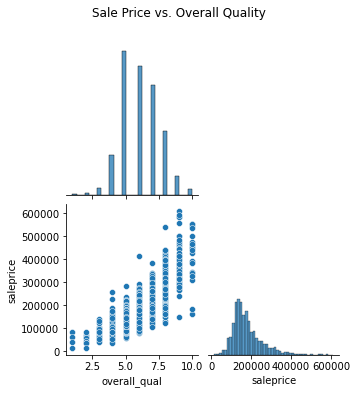

In [5]:
g = sns.pairplot(ames[['overall_qual', 'saleprice']], corner=True);
g.fig.suptitle('Sale Price vs. Overall Quality', y=1.08)
plt.savefig('../images/overall-quality.jpg')

As overall quality of the house increases the sale price increases. Most homes are below 200K.

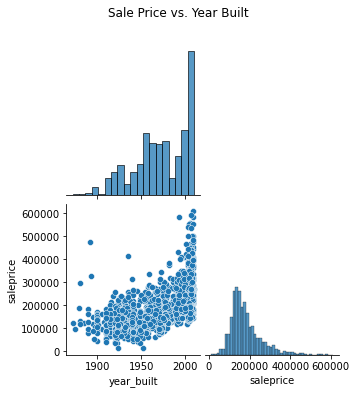

In [6]:
g = sns.pairplot(ames[['year_built', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Year Built', y=1.08);

Most homes are built between 1900 and 2000, the majority of these homes fall below 300K.
Houses built after 2000 begin to increase in price above the 300K range.

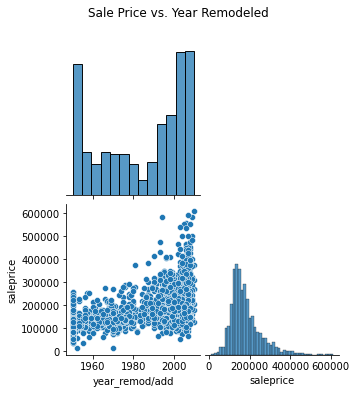

In [7]:
g = sns.pairplot(ames[['year_remod/add', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Year Remodeled', y=1.08);

Most homes were remodeled after 1960 and since then there is an upward trend of price increase.

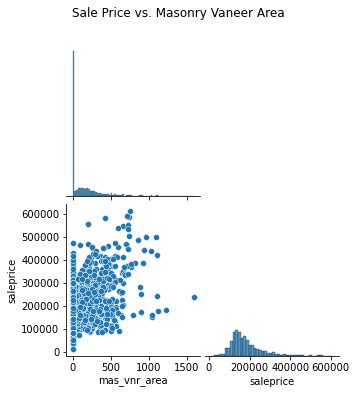

In [8]:
g = sns.pairplot(ames[['mas_vnr_area', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Masonry Vaneer Area', y=1.08);

Majority of homes masonry vaneer area fall beloow 500 sqft with a wide spread in sale price.

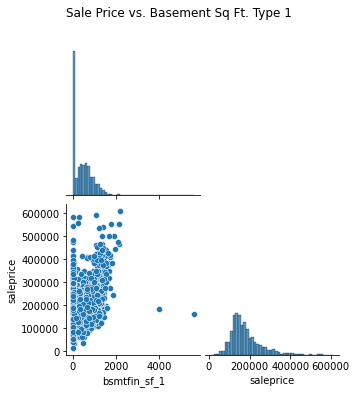

In [9]:
g = sns.pairplot(ames[['bsmtfin_sf_1', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Basement Sq Ft. Type 1', y=1.08);

Most homes basement sqft fall below 2000, and the home sale price is below 400K

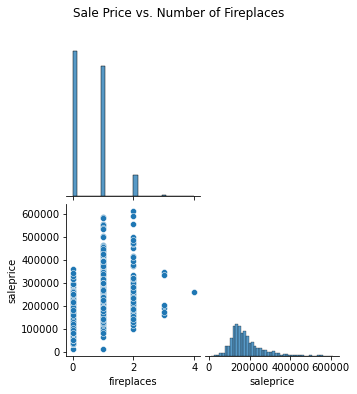

In [10]:
g = sns.pairplot(ames[['fireplaces', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Number of Fireplaces', y=1.08);
plt.savefig('../images/fireplaces.jpg')

Homes with fire places tend to have higher sale prices.

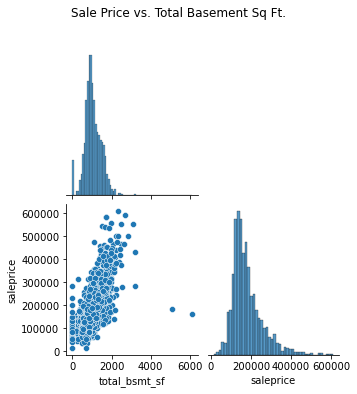

In [11]:
g = sns.pairplot(ames[['total_bsmt_sf', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Total Basement Sq Ft.', y=1.08);
plt.savefig('../images/bsmt-sf.jpg')

As the basement square footage increase the price increase. Most basements fall below 2000 sqft.

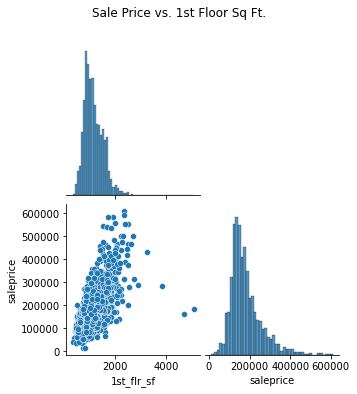

In [12]:
g = sns.pairplot(ames[['1st_flr_sf', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. 1st Floor Sq Ft.', y=1.08);
plt.savefig('../images/1st-flr-sf.jpg')

As the square footage increase the sale price increases.

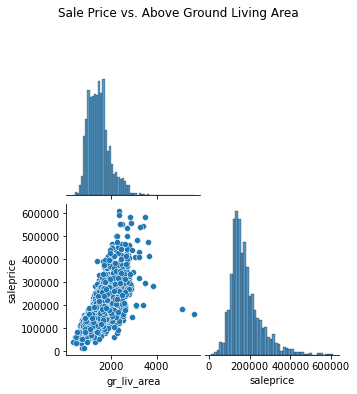

In [13]:
g = sns.pairplot(ames[['gr_liv_area', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Above Ground Living Area', y=1.08);
plt.savefig('../images/gr-liv-area.jpg')

As the above ground living area incrase the sale price increases.

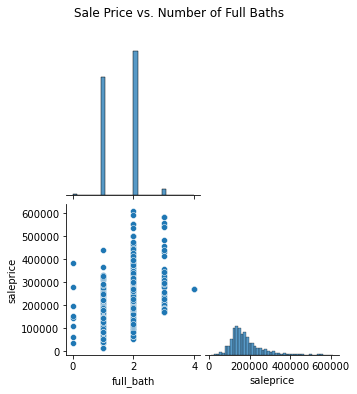

In [14]:
g = sns.pairplot(ames[['full_bath', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Number of Full Baths', y=1.08);

Majority of homes have 1 or 2 bathrooms. Those with 2 or more bathrooms tend to have higher sale prices.

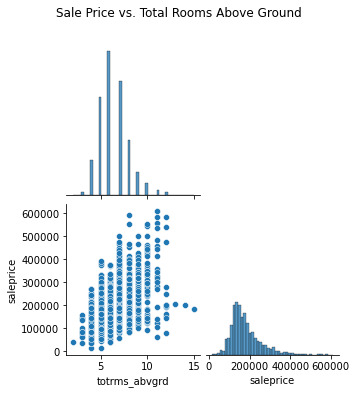

In [15]:
g = sns.pairplot(ames[['totrms_abvgrd', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Total Rooms Above Ground', y=1.08);

As the total number of rooms increase the sale price increases.

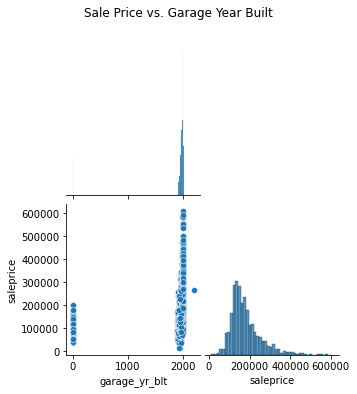

In [16]:
g = sns.pairplot(ames[['garage_yr_blt', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Garage Year Built', y=1.08);

Most garages were built between 1900 and 2000 with majority of sale prices for homes below 300k

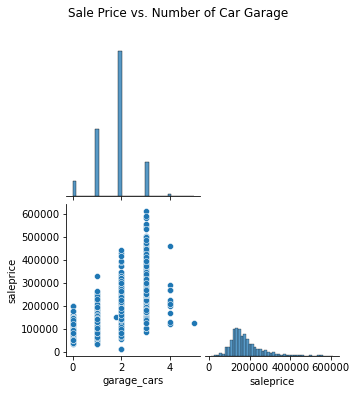

In [17]:
g = sns.pairplot(ames[['garage_cars', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Number of Car Garage', y=1.08);

Majority of homes have a 2 car garage. Homes with 2 or more car garage the price increases above 300K.

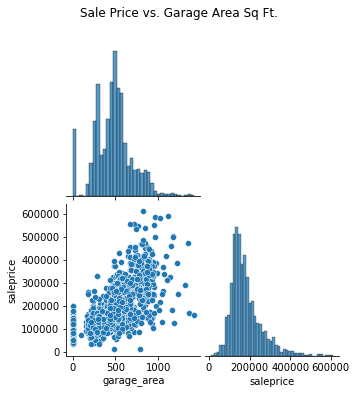

In [18]:
g = sns.pairplot(ames[['garage_area', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Garage Area Sq Ft.', y=1.08);

The bigger the garage the more the saleprice increases.

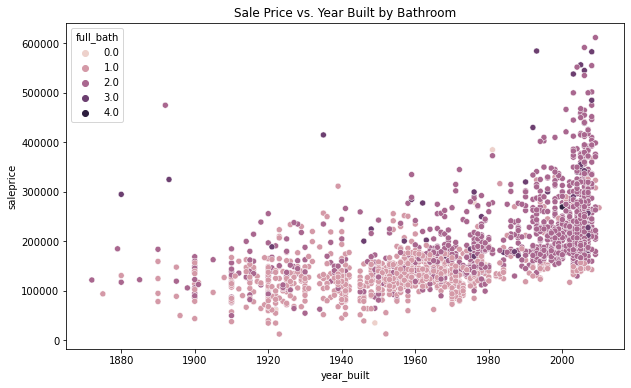

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ames, x='year_built', y='saleprice', hue='full_bath').set_title('Sale Price vs. Year Built by Bathroom');

Most homes with only 1 bathroom fall below 200K, having two or more bathrooms increases the sale price above 200K. The newer the home and the more bathrooms more expensive the house is.

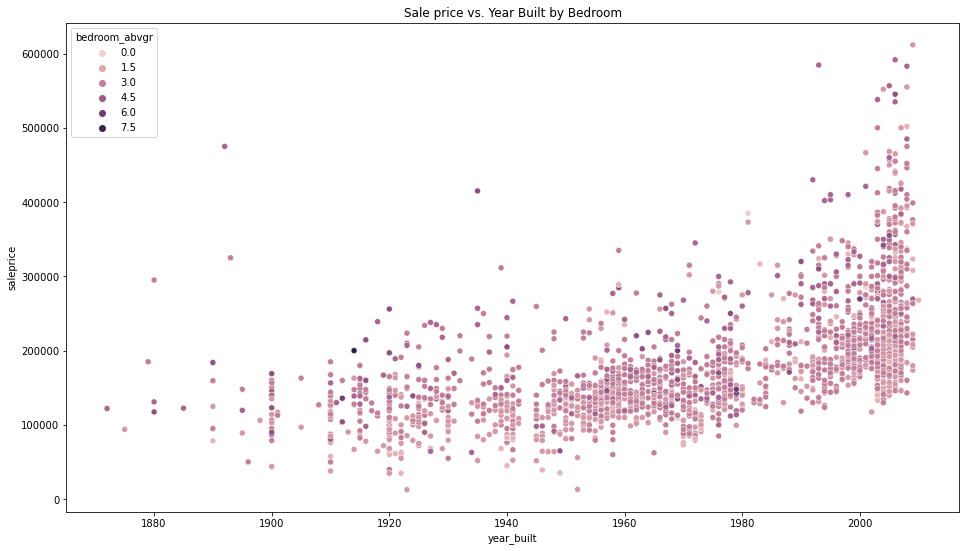

In [20]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=ames, x='year_built', y='saleprice', hue='bedroom_abvgr').set_title('Sale price vs. Year Built by Bedroom');

Most homes around 3 bedrooms. There doesn't seem to be a trend with more rooms equating to increased sale price. Also the number of bedrooms remains consistent over the years.

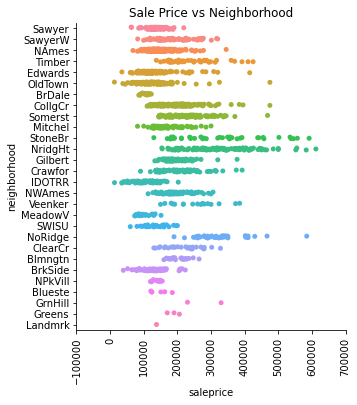

In [21]:
sns.catplot(data=ames, x='saleprice', y='neighborhood').set_xticklabels(rotation=90).set(title='Sale Price vs Neighborhood');
plt.savefig('../images/neighborhood-saleprice.jpg')

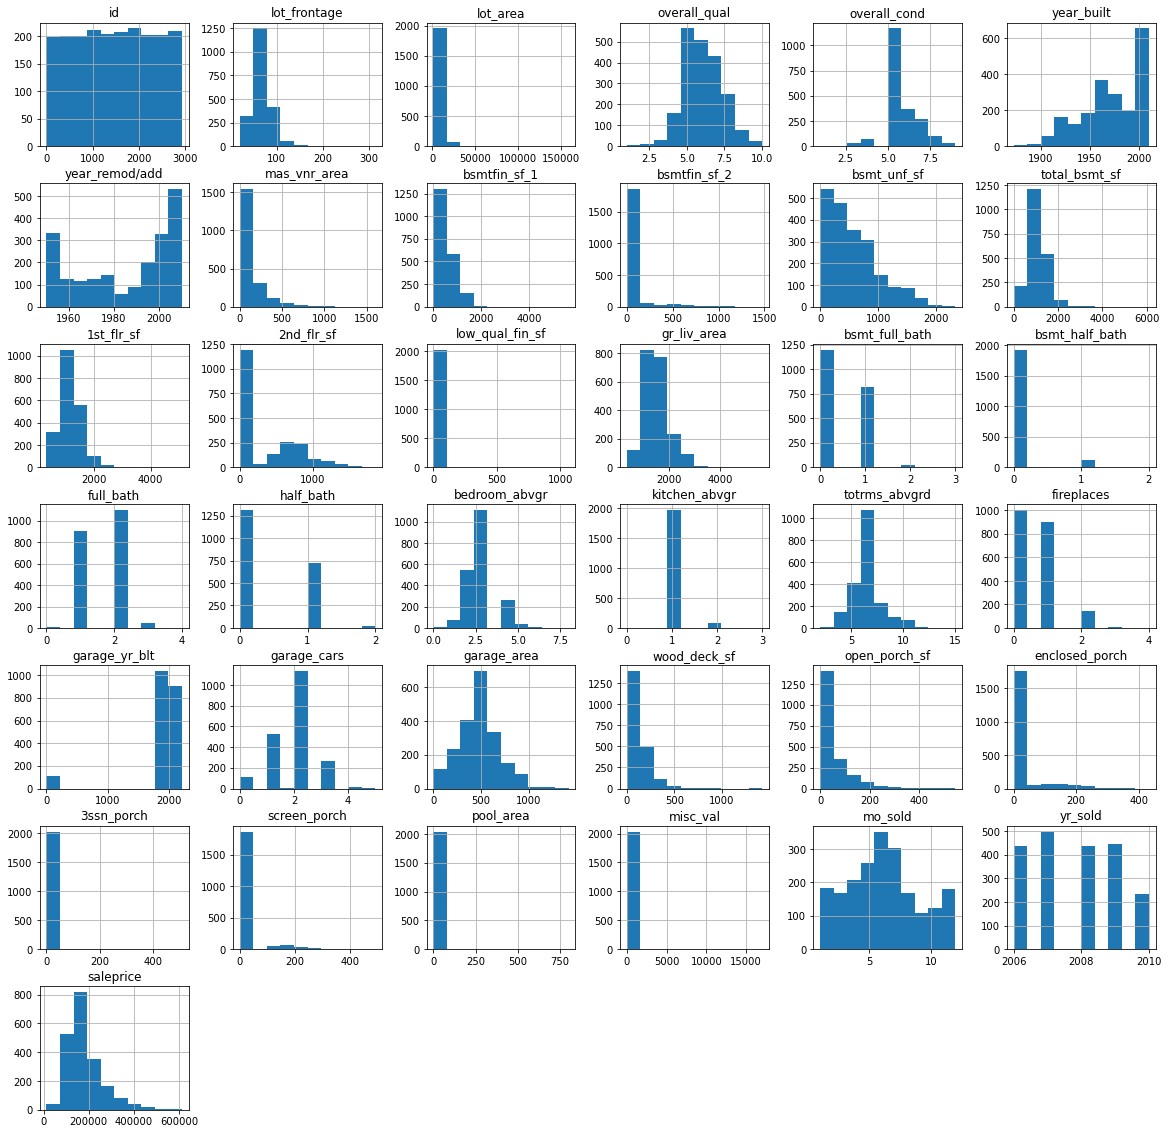

In [22]:
# Histogram of all numeric columns
ames.hist(figsize=(20, 20));

Most homes are 2000 sqft or under, and the overal quality and condition of homes are in good shape. Less homes were sold in 2010 compared to years prior. Most homes have 3 or less bedrooms.

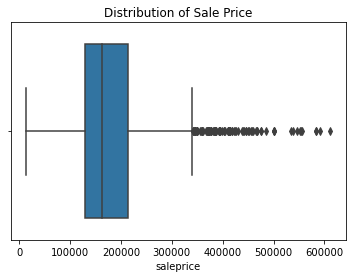

In [23]:
# Boxplot on salesprice
sns.boxplot(data = ames['saleprice'], x = ames['saleprice']).set(title='Distribution of Sale Price');

There are a lot of outliers for home sale prices. The median sale price is around $175,000

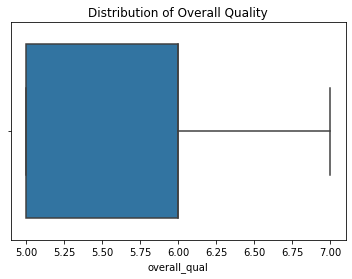

In [24]:
# Boxplot on overall quality
sns.boxplot(data = ames['overall_qual'], x = ames['overall_qual']).set(title='Distribution of Overall Quality');

There aren't any outliers on the strongest correlated feature with the max being at 7 and min at 5.

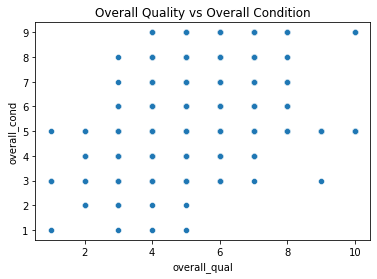

In [25]:
# scatterplot of overall_qual and overall_cond
sns.scatterplot(data = ames, x = 'overall_qual', y = 'overall_cond').set_title('Overall Quality vs Overall Condition');

Does not appear to be any trends between overall quality of the home and overall condition of the home.

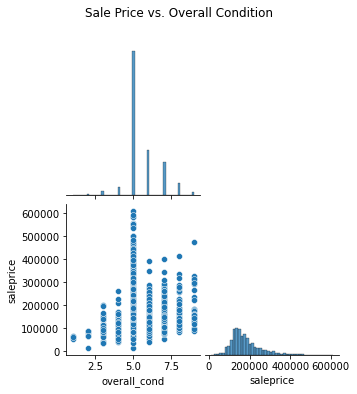

In [26]:
g = sns.pairplot(ames[['overall_cond', 'saleprice']], corner=True)
g.fig.suptitle('Sale Price vs. Overall Condition', y=1.08);

As the overall condition of the home increases, the sale price increases. Most homes have a 5 overall condition rating.

## Modeling

### Model Preparation

In [27]:
# Features
features = ['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
            'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath', 'totrms_abvgrd',
            'garage_yr_blt', 'garage_cars', 'garage_area', 'bedroom_abvgr', 'fireplaces']
X = ames[features]

# Target
y = ames['saleprice']

In [28]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

In [29]:
# instantiate Linear Regression model
model = LinearRegression()

### Model Fitting and Evaluation

In [30]:
# Cross validate model (R-squared)
model_scores = cross_val_score(model, X_train, y_train, cv=5)
model_scores.mean()

0.7561820214222156

In [31]:
# Fit model on training data
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# model coefficients
pd.Series(model.coef_, index = features)

overall_qual      19467.310610
year_built          193.667302
year_remod/add      347.508680
mas_vnr_area         32.551703
bsmtfin_sf_1         15.491935
total_bsmt_sf         7.239780
1st_flr_sf            8.012298
gr_liv_area          30.554645
full_bath         -1555.943556
totrms_abvgrd      4111.697647
garage_yr_blt        -9.976451
garage_cars        9502.761528
garage_area          27.793408
bedroom_abvgr     -3630.982068
fireplaces        10097.722362
dtype: float64

It appears that if the number of bedrooms, bathrooms, and when the garage was built would have a negative effect on sale price. This model isn't accurately weighing these features as these are important features for home buyers, which would indicate the need to scale theses features. 

In [33]:
# model intercept
model.intercept_

-1112860.9252030484

if all features did not exist, a home would be worthless. This does not account for the land a house sits on.

In [34]:
# Score model on training data (R-squared)
model.score(X_train, y_train)

0.7912880701902932

In [35]:
# Score model on test data (R-squared)
model.score(X_test, y_test)

0.8570186287354395

Model did better on test data than train data. Which means model is not overfitting the data. Model did better than the null model.

In [36]:
# MAE, MSE and RSME for Train data
y_pred = model.predict(X_train)

print("Train Evaluation")
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

Train Evaluation
MAE:  22759.015179009104
MSE:  1337090347.1448538
RMSE:  36566.24600837299


In [37]:
# MAE, MSE and RSME for Test data
y_pred = model.predict(X_test)

print("Test Evaluation")
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Test Evaluation
MAE:  21484.832235653364
MSE:  854660706.9730761
RMSE:  29234.580670382056


In all cases the model MAE, MSE, and RSME get closer to 0, which means the model performs better on the test data.

## Kaggle Submission

In [38]:
# Read in clean kaggle test data
ames_kaggle = pd.read_csv('../datasets/test_clean.csv', dtype={'ms_subclass': str, 'pid': str})
ames_kaggle.head()

,id,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,pid,ms_subclass,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,2658,69.000000,9142.0,6.0,8.0,1910.0,1950.0,0.0,0.0,0.0,1020.0,1020.0,908.0,1020.0,0.0,1928.0,0.0,0.0,2.0,0.0,4.0,2.0,9.0,0.0,1910.0,1.0,440.0,0.0,60.0,112.0,0.0,0.0,0.0,0.0,4.0,2006.0,902301120,190,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,Gable,CompShg,AsbShng,AsbShng,None,TA,Fa,Stone,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,Fa,Typ,None,Detchd,Unf,Po,Po,Y,None,None,None,WD
1,2718,69.545961,9662.0,5.0,4.0,1977.0,1977.0,0.0,0.0,0.0,1967.0,1967.0,1967.0,0.0,0.0,1967.0,0.0,0.0,2.0,0.0,6.0,2.0,10.0,0.0,1977.0,2.0,580.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2006.0,905108090,90,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD
2,2414,58.000000,17104.0,7.0,5.0,2006.0,2006.0,0.0,554.0,0.0,100.0,654.0,664.0,832.0,0.0,1496.0,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2006.0,2.0,426.0,100.0,24.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,528218130,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,New
3,1989,60.000000,8520.0,5.0,6.0,1923.0,2006.0,0.0,0.0,0.0,968.0,968.0,968.0,0.0,0.0,968.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1935.0,2.0,480.0,0.0,0.0,184.0,0.0,0.0,0.0,0.0,7.0,2007.0,902207150,30,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Detchd,Unf,Fa,TA,N,None,None,None,WD
4,625,69.545961,9500.0,6.0,5.0,1963.0,1963.0,247.0,609.0,0.0,785.0,1394.0,1394.0,0.0,0.0,1394.0,1.0,0.0,1.0,1.0,3.0,1.0,6.0,2.0,1963.0,2.0,514.0,0.0,76.0,0.0,0.0,185.0,0.0,0.0,7.0,2009.0,535105100,20,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,WD


In [39]:
# model predictions for kaggle
X_kaggle = ames_kaggle[features]
y_pred = model.predict(X_kaggle)

In [40]:
# Kaggle Submission
submission = pd.DataFrame(y_pred, columns = ['saleprice'], index = ames_kaggle['id'])

submission.head()

,saleprice
id,
2658,147104.811939
2718,176103.820689
2414,209064.058600
1989,123123.676419
625,193725.123813


In [41]:
submission.to_csv('../datasets/kaggle_submission.csv')